In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import seaborn as sns
import warnings
import pandas_profiling
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('hypertension_data.csv')

In [3]:
df.head(8)

,SEQN,GENDER,AGERANGE,RACE,BMIRANGE,KIDNEY,SMOKE,DIABETES,HYPCLASS
0,41475.0,2,5,5,4,2,2,2,0
1,41477.0,1,6,3,4,1,1,1,1
2,41479.0,1,4,1,3,2,2,2,0
3,41481.0,1,1,4,2,2,2,2,0
4,41482.0,1,5,1,4,2,1,2,0
5,41483.0,1,5,4,4,2,2,1,0
6,41485.0,2,1,2,3,2,2,2,0
7,41486.0,2,5,1,4,2,2,2,0


In [4]:
x = df[['GENDER', 'AGERANGE',"RACE",'BMIRANGE', 'SMOKE',
       'DIABETES']] 

In [5]:
df.shape

(24434, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24434 entries, 0 to 24433
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      24434 non-null  float64
 1   GENDER    24434 non-null  int64  
 2   AGERANGE  24434 non-null  int64  
 3   RACE      24434 non-null  int64  
 4   BMIRANGE  24434 non-null  int64  
 5   KIDNEY    24434 non-null  int64  
 6   SMOKE     24434 non-null  int64  
 7   DIABETES  24434 non-null  int64  
 8   HYPCLASS  24434 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 1.7 MB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SEQN,24434.0,67246.600925,15207.584861,41475.0,54080.5,66502.5,80731.75,93702.0
GENDER,24434.0,1.507039,0.499961,1.0,1.0,2.0,2.00,2.0
AGERANGE,24434.0,3.373046,1.702806,1.0,2.0,3.0,5.00,6.0
RACE,24434.0,3.008513,1.169858,1.0,2.0,3.0,4.00,5.0
BMIRANGE,24434.0,3.070721,0.842770,1.0,2.0,3.0,4.00,4.0
KIDNEY,24434.0,1.970901,0.168087,1.0,2.0,2.0,2.00,2.0
SMOKE,24434.0,1.553818,0.497105,1.0,1.0,2.0,2.00,2.0
DIABETES,24434.0,1.896742,0.369757,1.0,2.0,2.0,2.00,3.0
HYPCLASS,24434.0,0.302816,0.459486,0.0,0.0,0.0,1.00,1.0


## Feature Engineering

### Checking for null values

In [7]:
df.isnull().sum()

SEQN        0
GENDER      0
AGERANGE    0
RACE        0
BMIRANGE    0
KIDNEY      0
SMOKE       0
DIABETES    0
HYPCLASS    0
dtype: int64

#### No null values to handle

### Checking whether the target class is balanced or not

In [8]:
df["HYPCLASS"].value_counts()

0    17035
1     7399
Name: HYPCLASS, dtype: int64

[Text(0, 0, 'Non-hypertensive'), Text(0, 0, 'Hypertensive')]

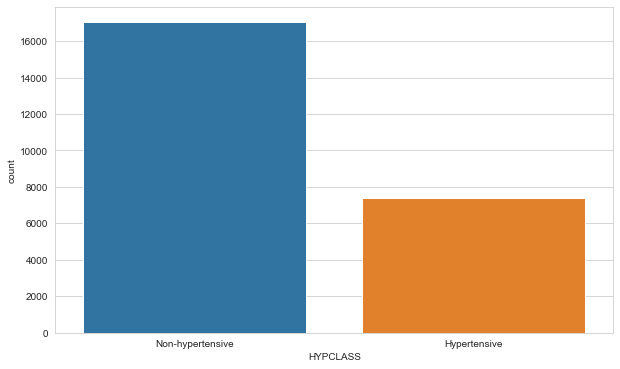

In [9]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plot=sns.countplot(x="HYPCLASS",data=df)
plot.set_xticklabels(["Non-hypertensive","Hypertensive"])

#### Seems to be unbalanced, going ahead with Over Sampling Technique

### Over Sampling

In [10]:
columns = df.columns.tolist()
columns

['SEQN',
 'GENDER',
 'AGERANGE',
 'RACE',
 'BMIRANGE',
 'KIDNEY',
 'SMOKE',
 'DIABETES',
 'HYPCLASS']

In [11]:
X = df[['SEQN',
 'GENDER',
 'AGERANGE',
 'RACE',
 'BMIRANGE',
 'KIDNEY',
 'SMOKE',
 'DIABETES']]
Y = df['HYPCLASS']

In [12]:
print(X.shape)
print(Y.shape)

(24434, 8)
(24434,)


In [13]:
## RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [14]:
os =RandomOverSampler(sampling_strategy=0.5)

In [15]:
X_train_res, y_train_res = os.fit_resample(X, Y)

In [16]:
X_train_res.shape,y_train_res.shape

((25552, 8), (25552,))

In [17]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 17035, 1: 7399})
Resampled dataset shape Counter({0: 17035, 1: 8517})


In [18]:
df=X_train_res
df['HYPCLASS']=y_train_res

In [19]:
df.head()

,SEQN,GENDER,AGERANGE,RACE,BMIRANGE,KIDNEY,SMOKE,DIABETES,HYPCLASS
0,41475.0,2,5,5,4,2,2,2,0
1,41477.0,1,6,3,4,1,1,1,1
2,41479.0,1,4,1,3,2,2,2,0
3,41481.0,1,1,4,2,2,2,2,0
4,41482.0,1,5,1,4,2,1,2,0


## Performing EDA using Panda Profiling

In [139]:
prof_report = pandas_profiling.ProfileReport(df , title = 'Hypertension Detection',correlations=None)
prof_report.to_widgets()

## Feature Selection

#### Using Filter method ( X-Square technique)

In [20]:
df.columns

Index(['SEQN', 'GENDER', 'AGERANGE', 'RACE', 'BMIRANGE', 'KIDNEY', 'SMOKE',
       'DIABETES', 'HYPCLASS'],
      dtype='object')

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df[['GENDER', 'AGERANGE', 'RACE', 'BMIRANGE', 'KIDNEY', 'SMOKE',
       'DIABETES',]]  #independent columns
y = df['HYPCLASS']    #target column

In [22]:
#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)

In [23]:
dfscores = pd.DataFrame(fit.scores_)
dfpvalues=pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X.columns)

In [24]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores,dfpvalues],axis=1)
featureScores.columns = ['Specs','Score',"P-Values"]  #naming the dataframe columns

In [25]:
featureScores

,Specs,Score,P-Values
0,GENDER,11.870251,5.703773e-04
1,AGERANGE,3626.473175,0.000000e+00
2,RACE,8.915254,2.827985e-03
3,BMIRANGE,49.741639,1.753840e-12
4,KIDNEY,2.166957,1.410050e-01
5,SMOKE,10.291435,1.336491e-03
6,DIABETES,22.901205,1.705449e-06


In [26]:
print(featureScores.nlargest(6,'Score'))  #print 6 best features

      Specs        Score      P-Values
1  AGERANGE  3626.473175  0.000000e+00
3  BMIRANGE    49.741639  1.753840e-12
6  DIABETES    22.901205  1.705449e-06
0    GENDER    11.870251  5.703773e-04
5     SMOKE    10.291435  1.336491e-03
2      RACE     8.915254  2.827985e-03


In [27]:
x = df[['GENDER', 'AGERANGE',"RACE",'BMIRANGE', 'SMOKE',
       'DIABETES']] 

In [28]:
y = df['HYPCLASS'] 

## Model 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

## ANN

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =101)

from sklearn.preprocessing import StandardScaler
standardScaler=StandardScaler()
x_train = standardScaler.fit_transform(x_train)

x_test= standardScaler.transform(x_test)

# from sklearn.preprocessing import MinMaxScaler
# min_max=MinMaxScaler()
# x_train=pd.DataFrame(min_max.fit_transform(x_train),columns=x_train.columns)
# x_test=pd.DataFrame(min_max.transform(x_test),columns=x_test.columns)

# x_train=x_train.to_numpy()
# x_test=x_test.to_numpy()

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import EarlyStopping

In [54]:
model =Sequential()


model.add(Dense(100,activation="relu"))
model.add(Dropout(0.7))
model.add(Dense(100,activation="relu"))
model.add(Dropout(0.7))
model.add(Dense(50,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(20,activation="relu"))
model.add(Dropout(0.5))

#Binary classification
model.add(Dense(1,activation="sigmoid"))
adam=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False,name="Adam")

In [55]:
import tensorflow
from IPython.display import clear_output
class PlotLearning(tensorflow.keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()

In [56]:
early_stop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=10)

In [57]:
model.compile(loss="binary_crossentropy",optimizer=adam,metrics=["accuracy"])

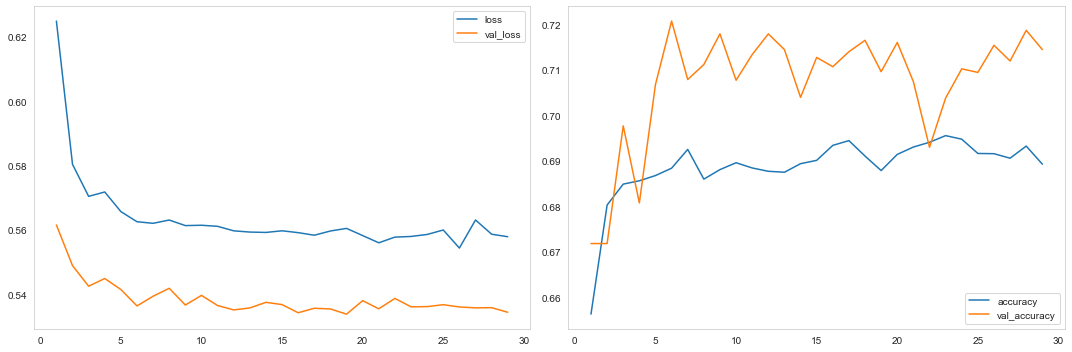

Epoch 00029: early stopping


In [58]:
model.fit(x=x_train,y=y_train,epochs=100,validation_data=(x_test,y_test),callbacks=[early_stop,PlotLearning()],batch_size=15)

In [230]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      4231
           1       0.62      0.69      0.65      3009

    accuracy                           0.70      7240
   macro avg       0.69      0.69      0.69      7240
weighted avg       0.70      0.70      0.70      7240



In [220]:
model.save("acc70r70.h5")

In [31]:
#Saving the scaler to disk
import pickle
pickle.dump(standardScaler, open('HypertensionScaler.pkl', 'wb'))